In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.chdir('U:\ProjectDataset')

In [4]:
dt=pd.read_excel('LUSCZscores.xlsx')

In [5]:
dt=dt.set_index(dt.columns[0])

In [6]:
del dt['Overall Survival (Months)']

In [8]:
del dt['Sample ID']

In [11]:
dtr=dt.T

In [12]:
dtr.to_excel('LUSCZscoresT.xlsx')

In [17]:
tar=pd.read_excel('survival_LUSC.xlsx')

In [18]:
import numpy as np
y=np.array(tar)
y=y.flatten()

In [19]:
df=dt

In [41]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=1,max_depth=10)
df=pd.get_dummies(df)
model.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

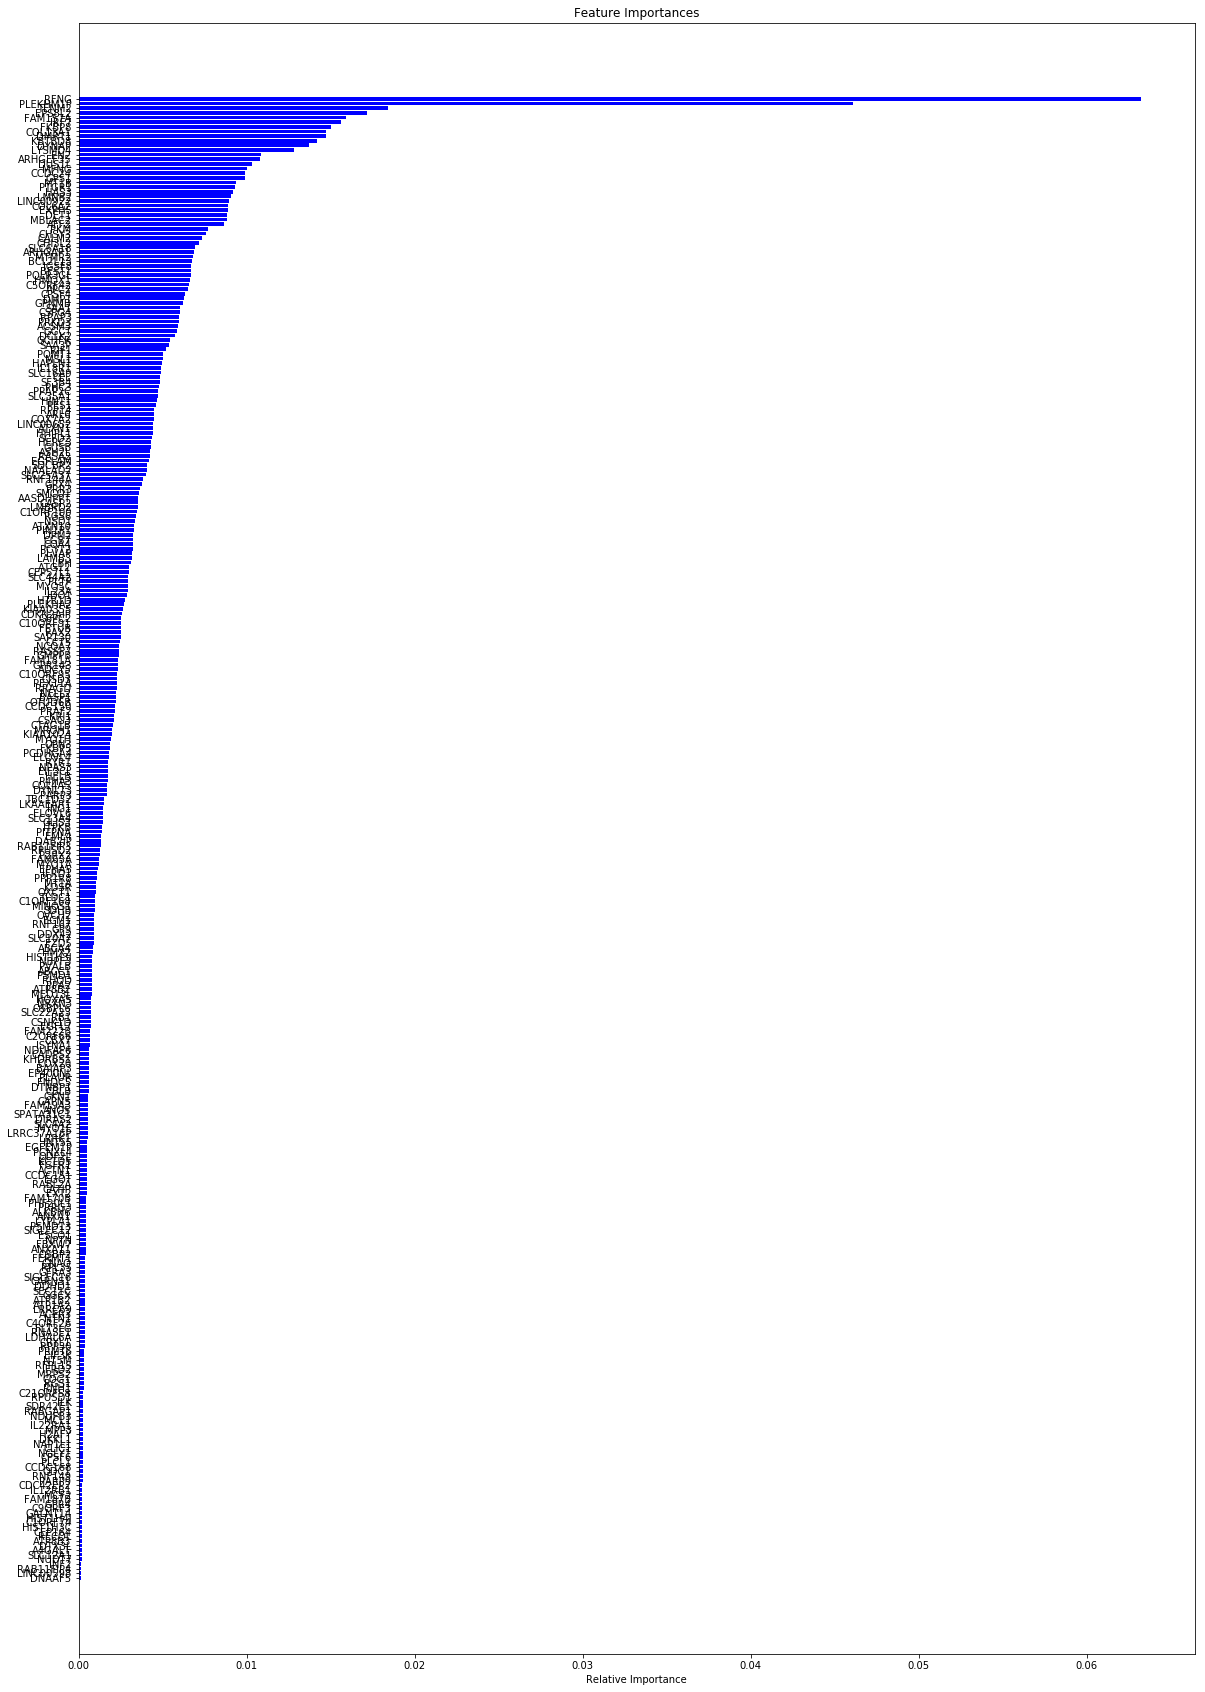

<Figure size 432x288 with 0 Axes>

In [46]:
#
features = df.columns
importances = model.feature_importances_
plt.figure(figsize=(20,30))
indices = np.argsort(importances)[-320:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('LUAD.png')

In [47]:
imp=[features[i] for i in indices]

In [48]:
len(imp)

320

In [49]:
i=pd.DataFrame({'Col':imp})

In [50]:
i.to_excel('LUSC_features.xlsx')